### Calculating Retardance using setup from paper with two LP

The setup for the calibation consists of two linear polarizers and a retardance plate. First we need to determine the x-axis of the incoming light beam. Therefore we insert the first LP in the light beam and rotate it until we get maximum intensity and maximum horizontal polarization on the polarimeter. The transmission axis now corresponds to the x-axis. Now we insert the second LP P2 and rotate it again until we get maximum intensity and maximum horizontal polarization. The transmission axis of P2 is aligned with angle $\alpha$=0. Because the end formula for the retardance is dependent on $ \alpha$ \begin{align}
cos\delta (\lambda)= \frac{1- |\eta| cos2\alpha - 2 \frac{|\eta|}{ k_{inc}(\lambda)}}{1 + |\eta| cos 2 \alpha}
\end{align}
we rotate P2 to $\alpha= \frac{\pi}{4}$ to simplify the formula.

Now where the angles are determined we need to find the efficiency $k_{inc(\lambda)}$ of P1, which is found by rotating P2 and measuring the minimum and maximum intensities.
\begin{align}
\frac{M}{I}(\lambda) = k_{inc}(\lambda)= \frac{I_{max}- I_{min}}{I_{max}- I_{min}}
\end{align}

Then we insert the retardance plate inbetween, let it rotate and measure the intensity, which should again show maxima and minima. From that we get $\eta$ = \frac{I_{max, ret}- I_{min, ret}}{I_{max, ret}- I_{min,ret}}$

In [1]:
### Read in the data for the wave-plates

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import Symbol, cos, sin, pi, sqrt, symbols
from sympy.matrices import *
from sympy.utilities.lambdify import lambdify
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False, no_global=True)

from scipy.optimize import curve_fit, minimize

import os
from os.path import join, getsize

import matplotlib as mpl
mpl.use('pdf')

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 8,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8.7)
plt.rc('ytick', labelsize=8.7)
plt.rc('axes', labelsize=8.7)

# width as measured in inkscape
width = 2.809
height = width / 1.618

directories=[]


for root, dirs, files in os.walk('20190513/'):
    if files != []:
        a=str(root)+str('/')+str(files[0])
        directories.append(a)
for root, dirs, files in os.walk('20190514/'):
    if files != []:
        a=str(root)+str('/')+str(files[0])
        directories.append(a)
# Only half-wave and quarter-wave plates
directories=directories[0:6]
print(directories)
data=[]
measurement_point_all=[]
angle_all=[]
s1_all=[]
s2_all=[]
s3_all=[]
dop_all=[]
power_all=[]

for i in directories:
    f=open(i)
    lines=f.readlines()
    for i in range(26):
        lines.pop(0)
    measurement_point=[]
    angle=[]
    s1=[]
    s2=[]
    s3=[]
    dop=[]
    power=[]
    for line in lines:
        measurement_point.append( line.strip().split('\t')[0] )
        angle.append( line.strip().split('\t')[1] )
        s1.append( line.strip().split('\t')[2] )
        s2.append( line.strip().split('\t')[3] )
        s3.append( line.strip().split('\t')[4] )
        dop.append( line.strip().split('\t')[5] )
        power.append( line.strip().split('\t')[6] )
    measurement_point_all.append(np.array(measurement_point).astype(np.float))
    angle_all.append(np.array(angle).astype(np.float))
    s1_all.append(np.array(s1).astype(np.float))
    s2_all.append(np.array(s2).astype(np.float))
    s3_all.append(np.array(s3).astype(np.float))
    dop_all.append(np.array(dop).astype(np.float))
    power_all.append(np.array(power).astype(np.float))
    

measurement_point=np.array(measurement_point_all)
#measurement_point=measurement_point.astype(np.float)  
display(len(measurement_point[0]))
angle=np.array(angle_all)
s1=np.array(s1_all)
s2=np.array(s2_all)
s3=np.array(s3_all)
dop=np.array(dop_all)
power=np.array(power_all)

alpha=np.pi

single_measurements_measurement_point_1=[]
single_measurements_angle_1=[]
single_measurements_s1_1=[]
single_measurements_s2_1=[]
single_measurements_s3_1=[]
single_measurements_dop_1=[]
single_measurements_power_1=[]

print(np.arange(10))

for i in np.arange(10):
    single_measurements_measurement_point_1.append(measurement_point[1][361*i:(i+1)*361])
    single_measurements_angle_1.append(angle[1][361*i:(i+1)*361])
    single_measurements_s1_1.append(s1[1][361*i:(i+1)*361])
    single_measurements_s2_1.append(s2[1][361*i:(i+1)*361])
    single_measurements_s3_1.append(s3[1][361*i:(i+1)*361])
    single_measurements_dop_1.append(dop[1][361*i:(i+1)*361])
    single_measurements_power_1.append(power[1][361*i:(i+1)*361])
    
etas_1= [( np.abs(np.amax(single_measurements_power_1[i]))- np.amin( np.abs(single_measurements_power_1[i]) ))/
         ( np.abs(np.amax(single_measurements_power_1[i]))+ np.abs(np.amin(single_measurements_power_1[i])) ) for i in np.arange(len(single_measurements_power_1)) ]
    
print((np.amin(single_measurements_power_1[5])))
plt.plot(single_measurements_measurement_point_1[5] ,single_measurements_power_1[5])
I_max=np.amax(power[0])
I_min=np.amin(power[0])
names=['intensity', ' 1/4 600-2700 nm', 'noise', ' 1/4 690-1200 nm' ]
# 600-2700 seems to be best
k_inc=(I_max-I_min)/(I_max+I_min)
print('k_inc', I_max, I_min)

cos_delta_1=[ (1-etas_1[i]*np.cos(2*alpha)-2*etas_1[i]/k_inc)/
           (1 + etas_1[i]*np.cos(2*alpha)) for i in np.arange(len(single_measurements_power_1)) ]
print('cos_delta', cos_delta_1)
delta_1=np.arccos(cos_delta_1)

delta_angle_1= delta_1*180/np.pi

print(delta_angle_1)

mean_delta_angle_1=np.mean(delta_angle_1)
error_delta_angle_1=np.std(delta_angle_1)

print('mean_delta_angle', mean_delta_angle_1)
print('error_delta_angle', error_delta_angle_1)





C:\Users\P\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


['20190513/143126_polarimeter_vs_wheel/143126_polarimeter_vs_wheel.dat', '20190513/165855_polarimeter_vs_wheel/165855_polarimeter_vs_wheel.dat', '20190513/184211_polarimeter_vs_wheel/184211_polarimeter_vs_wheel.dat', '20190513/193010_polarimeter_vs_wheel/193010_polarimeter_vs_wheel.dat', '20190514/163211_polarimeter_vs_wheel/163211_polarimeter_vs_wheel.dat', '20190514/182111_polarimeter_vs_wheel/182111_polarimeter_vs_wheel.dat']


[0 1 2 3 4 5 6 7 8 9]
-3.094452027952e-09
k_inc 6.021492481523e-06 1.170170488285e-10
cos_delta [-0.9992548488382217, -0.9992445353360611, -0.9998588701147443, -0.9993717507552632, -0.998900302215747, -0.9987946067454025, -0.9999924584010684, -0.9997658781611807, -0.9997723185391365, -0.9984921257200139]
[177.78799149 177.77273418 179.03738587 177.96892314 177.31271262
 177.18650827 179.77747971 178.76015594 178.77732874 176.85315912]
mean_delta_angle 178.12343790685313
error_delta_angle 0.8838694069276862


[0 1 2 3 4 5 6 7 8 9]
k_inc 6.021492481523e-06 1.170170488285e-10
[167.75762887 169.14066837 169.62450868 172.00159939 167.5538863
 170.7015476  167.97560023 171.55332979 171.35011235 169.76548783]
mean_delta_angle 169.7424369401224
error_delta_angle 1.5529054736324313


C:\Users\P\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


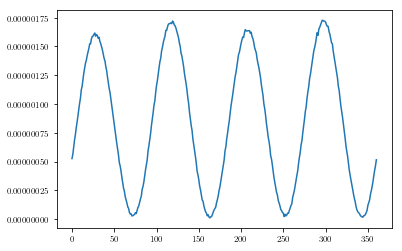

In [3]:
single_measurements_measurement_point_3=[]
single_measurements_angle_3=[]
single_measurements_s1_3=[]
single_measurements_s2_3=[]
single_measurements_s3_3=[]
single_measurements_dop_3=[]
single_measurements_power_3=[]

print(np.arange(10))

for i in np.arange(10):
    single_measurements_measurement_point_3.append(measurement_point[3][361*i:(i+1)*361])
    single_measurements_angle_3.append(angle[3][361*i:(i+1)*361])
    single_measurements_s1_3.append(s1[3][361*i:(i+1)*361])
    single_measurements_s2_3.append(s2[3][361*i:(i+1)*361])
    single_measurements_s3_3.append(s3[3][361*i:(i+1)*361])
    single_measurements_dop_3.append(dop[3][361*i:(i+1)*361])
    single_measurements_power_3.append(power[3][361*i:(i+1)*361])
    
etas_3= [( np.abs(np.amax(single_measurements_power_3[i]))- np.amin( np.abs(single_measurements_power_3[i]) ))/
         ( np.abs(np.amax(single_measurements_power_3[i]))+ np.abs(np.amin(single_measurements_power_3[i])) ) for i in np.arange(len(single_measurements_power_3)) ]
    
#print((np.amin(single_measurements_power_1[5])))
plt.plot(single_measurements_measurement_point_3[5] ,single_measurements_power_3[5])
I_max=np.amax(power[0])
I_min=np.amin(power[0])
names=['intensity', ' 1/4 600-2700 nm (alpha=90)' , 'noise', ' 1/4 690-1200 nm (alpha=90)', ' 1/4 690-1200 nm (alpha=45)' ]
# 600-2700 seems to be best
k_inc=(I_max-I_min)/(I_max+I_min)
print('k_inc', I_max, I_min)

cos_delta_3=[ (1-etas_3[i]*np.cos(2*alpha)-2*etas_3[i]/k_inc)/
           (1 + etas_3[i]*np.cos(2*alpha)) for i in np.arange(len(single_measurements_power_3)) ]
#print('cos_delta', cos_delta)
delta_3=np.arccos(cos_delta_3)

delta_angle_3= delta_3*180/np.pi

print(delta_angle_3)

mean_delta_angle_3=np.mean(delta_angle_3)
error_delta_angle_3=np.std(delta_angle_3)

print('mean_delta_angle', mean_delta_angle_3)
print('error_delta_angle', error_delta_angle_3)

[0 1 2 3 4 5 6 7 8 9]


<IPython.core.display.Javascript object>


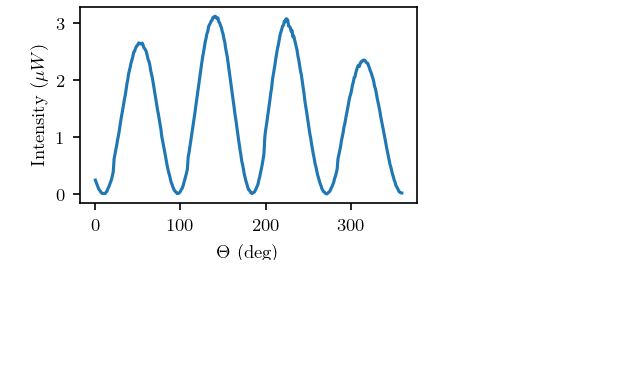

k_inc 6.021492481523e-06 1.170170488285e-10
[ 98.74954353  99.01635975  99.62877987  99.42626864  99.55421133
  99.39464841  99.77038957  99.64540964  99.38384049 100.05662847]
mean_delta_angle 99.46260797049551
error_delta_angle 0.3516748963313025
sigma_I_max= 4.2999999999999996e-07
sigma_I_min= 1.3800000000000002e-07
k_inc 0.9999611342951228
sigma_k_inc 0.045834031101514114
len 10
[125219.95775022 123395.86570714 121589.07619497 122715.45228363
 122383.06785056 123589.38580508 122801.56260017 122746.70608352
 123844.49793773 121400.69808128]
etas_4 [0.57603537 0.57833576 0.58360931 0.58186652 0.5829677  0.5815943
 0.58482738 0.58375238 0.58150125 0.58728789]
sigma_etas_4 [0.02680709 0.02656579 0.02652068 0.02665059 0.02665123 0.02682227
 0.02686677 0.02678274 0.02687144 0.02672488]
cos_delta_4 [-0.15211551200531215, -0.15671647482292017, -0.16726399488600374, -0.16377826295179276, -0.16598072190951996, -0.163233812882857, -0.16970021819560688, -0.16755014319043693, -0.163047706319196

In [6]:
alpha=np.pi/4# + 5*(np.pi/2)/90

#alpha=np.pi

single_measurements_measurement_point_4=[]
single_measurements_angle_4=[]
single_measurements_s1_4=[]
single_measurements_s2_4=[]
single_measurements_s3_4=[]
single_measurements_dop_4=[]
single_measurements_power_4=[]

print(np.arange(10))

for i in np.arange(10):
    single_measurements_measurement_point_4.append(measurement_point[4][361*i:(i+1)*361])
    single_measurements_angle_4.append(angle[4][361*i:(i+1)*361])
    single_measurements_s1_4.append(s1[4][361*i:(i+1)*361])
    single_measurements_s2_4.append(s2[4][361*i:(i+1)*361])
    single_measurements_s3_4.append(s3[4][361*i:(i+1)*361])
    single_measurements_dop_4.append(dop[4][361*i:(i+1)*361])
    single_measurements_power_4.append(power[4][361*i:(i+1)*361])
    
etas_4= np.array([( np.amax(single_measurements_power_4[i])-
                   np.amin( single_measurements_power_4[i] ))/
                  ( np.amax(single_measurements_power_4[i])
                  + np.amin(single_measurements_power_4[i]) ) for i in np.arange(len(single_measurements_power_4)) ])
    
#print((np.amin(single_measurements_power_1[5])))

	

%matplotlib notebook

fig, ax = plt.subplots()
fig.subplots_adjust(left=.19, bottom=.22, right=.99, top=.97)
plt.plot(single_measurements_measurement_point_4[1] ,single_measurements_power_4[1]*10**(6))
ax.set_xlabel(r'$\Theta$ (deg)')
ax.set_ylabel(r'Intensity ($\mu W$)')
fig.set_size_inches(width, height)
fig.savefig('retardance_from_LP_errors_QWP.pdf')
plt.show()


I_max=np.amax(power[0])
I_min=np.amin(power[0])
names=['intensity', ' 1/4 600-2700 nm (alpha=90)' , 'noise', ' 1/4 690-1200 nm (alpha=90)', ' 1/4 690-1200 nm (alpha=45)' ]
# 600-2700 seems to be best
k_inc=(I_max-I_min)/(I_max+I_min)
print('k_inc', I_max, I_min)

cos_delta_4=[ (1-etas_4[i]*np.cos(2*alpha)-2*etas_4[i]/k_inc)/
           (1 + etas_4[i]*np.cos(2*alpha)) for i in np.arange(len(single_measurements_power_4)) ]
#print('cos_delta', cos_delta)
delta_4=np.arccos(cos_delta_4)

delta_angle_4= delta_4*180/np.pi

print(delta_angle_4)

mean_delta_angle_4=np.mean(delta_angle_4)
error_delta_angle_4=np.std(delta_angle_4)

print('mean_delta_angle', mean_delta_angle_4)
print('error_delta_angle', error_delta_angle_4)

# relative error on intensity from noise measurement
err_rel_intensity_from_noise = 0.004437447357165156
#err_rel_intensity_from_sys_max= 0.10
#err_rel_intensity_from_sys_min= 0.13

power_0_err = power[0]*err_rel_intensity_from_noise

#sigma_I_max=I_max*err_rel_intensity_from_noise
#sigma_I_min=I_min*err_rel_intensity_from_noise

sigma_I_max=0.43*10**(-6)
sigma_I_min=0.138*10**(-6)

print("sigma_I_max=", sigma_I_max)
print("sigma_I_min=", sigma_I_min)

dkdI_max=2*I_min/(I_max+I_min)**2
dkdI_min=-2*I_max/(I_max+I_min)**2

sigma_k_inc=np.sqrt( (dkdI_max*sigma_I_max)**2  + (dkdI_min*sigma_I_min)**2)
print('k_inc', k_inc)
print('sigma_k_inc',sigma_k_inc)



I_max_etas_4=np.abs(np.amax(single_measurements_power_4))
I_min_etas_4=np.abs(np.amin(single_measurements_power_4))


I_max_etas_4=np.array([np.abs(np.amax(single_measurements_power_4[i])) for i in np.arange(len(single_measurements_power_4))])
I_min_etas_4=np.array([np.abs(np.amin(single_measurements_power_4[i])) for i in np.arange(len(single_measurements_power_4))])

print("len",len(I_max_etas_4))
sigma_I_max_etas_4=I_max_etas_4*err_rel_intensity_from_noise
sigma_I_min_etas_4=I_min_etas_4*err_rel_intensity_from_noise

#sigma_I_max_etas_4=np.array([0.8*0.43*10**(-6) for i in I_max_etas_4])
#sigma_I_min_etas_4=np.array([0.8*0.138*10**(-6) for i in I_max_etas_4])

sigma_I_max_etas_4=np.array([0.092*10**(-6) for i in I_max_etas_4])
sigma_I_min_etas_4=np.array([0.052*10**(-6) for i in I_max_etas_4])

dkdI_max_etas_4=2*I_min_etas_4/(I_max_etas_4+I_min_etas_4)**2
dkdI_min_etas_4=-2*I_max_etas_4/(I_max_etas_4+I_min_etas_4)**2

print(dkdI_max_etas_4)

sigma_etas_4=np.sqrt( (dkdI_max_etas_4*sigma_I_max_etas_4)**2  + (dkdI_min_etas_4*sigma_I_min_etas_4)**2)
#etas_4_err= [sigma_etas_4[i] for i in np.arange(len(single_measurements_power_4)) ]
print('etas_4',etas_4)
print('sigma_etas_4',sigma_etas_4)

#cos_delta_4=[ (1-etas_4[i]*np.cos(2*alpha)-2*etas_4[i]/k_inc)/
#           (1 + etas_4[i]*np.cos(2*alpha)) for i in np.arange(len(single_measurements_power_4)) ]

sigma_alpha=(np.pi/180)*2

dcos_delta_4detas_4= ((-np.cos(2*alpha)-2/k_inc) * (1 + etas_4*np.cos(2*alpha)) - (np.cos(2*alpha))*(1-etas_4*np.cos(2*alpha)-2*etas_4/k_inc))/(1 + etas_4*np.cos(2*alpha))**2
dcos_delta_4dalpha= ((+etas_4*2*np.sin(2*alpha))*(1 + etas_4*np.cos(2*alpha)) - (-etas_4*2*np.sin(2*alpha))*((1-etas_4*np.cos(2*alpha)-2*etas_4/k_inc)))/(1 + etas_4*np.cos(2*alpha))**2
dcos_delta_4dk_inc= ((2*etas_4/k_inc**2)*(1 + etas_4*np.cos(2*alpha)) - ((-2*etas_4/k_inc))*(0))/(1 + etas_4*np.cos(2*alpha))**2

sigma_cos_delta_4=np.sqrt( (dcos_delta_4detas_4*sigma_etas_4)**2  + (dcos_delta_4dalpha*sigma_alpha)**2 + (dcos_delta_4dk_inc*sigma_k_inc)**2 )
print('cos_delta_4', cos_delta_4)
print('sigma_cos_delta_4', sigma_cos_delta_4 )
sigma_delta_4=np.arccos(sigma_cos_delta_4)
mean_sigma_delta_4=np.mean(sigma_delta_4)

print("mean_sigma_delta_4", mean_sigma_delta_4*180/np.pi)
